In [ ]:
import os 

In [ ]:
cwd = os.getcwd()
root = os.pardir
fibre = os.path.join(cwd,root,"Fiber 10")
files = os.listdir(fibre)

In [ ]:
import pandas as pd 

In [ ]:
def slope(x_init, y_init, x_final, y_final):
    if (x_final - x_init != 0):
        return (y_final - y_init)/(x_final - x_init)
    else:
        return float('inf')
        slopes = []
    


In [ ]:
def analysis(file_name):
    file = os.path.join('..',fibre, file_name)
    df = pd.read_excel(file)
    experiment = df.iloc[2:,:3]
    renaming = df.iloc[:1,:3].T.to_dict()
    experiment.rename(columns=renaming[0])
    consts = df.iloc[:,4:6].dropna().T.to_dict(orient="records")
    const = pd.DataFrame(columns=consts[0].values(), data=[consts[1].values()])
    experiment.rename(columns=renaming[0],inplace=True)
    experiment.rename(columns={"Standard force": 'Force'},inplace=True)
    slopes = []
    for i in range(len(experiment.Strain)-1):
        slopes.append(slope(experiment.Strain.iloc[i],experiment.Force.iloc[i],
                            experiment.Strain.iloc[i+1], experiment.Force.iloc[i+1]))
    ratios = []
    for index, sl in enumerate(slopes):
        if index > 4 and index <-1:
            ratio = abs((slopes[index+1] - sl)/sl)
            # print(f"{ratio} ---- {index}/{len(slopes)}")
            if ratio < 0.5 or ratio > 1.5:
                ratios.append(ratio)
            else:
                break
    pt_Strain = experiment.iloc[index]["Strain"]
    pt_Force = experiment.iloc[index]["Force"]

    sec_Strain = experiment.Strain.max()
    sec_Force = experiment[experiment["Strain"] == sec_Strain].Force.iloc[0]
    return [pt_Strain, sec_Force], [sec_Strain, sec_Force]
    # return [pt_df, sec_df]
    

In [ ]:
import numpy as np 

In [ ]:
def point_df(file_name, point):
    file = os.path.join("..",fibre,file_name)
    df = pd.read_excel(file)
    experiment = df.iloc[2:,:3]
    renaming = df.iloc[:1,:3].T.to_dict()
    experiment.rename(columns=renaming[0],inplace=True)
    print(point[0])
    data = experiment[experiment['Strain'] == point[0]]
    constants = df.iloc[:,4:].dropna()
    constants = constants.to_dict(orient="split",index=False)['data']
    const_dict = {const[0]:const[1] for const in constants}
    const_df = pd.DataFrame(columns=const_dict,data=[const_dict.values()])
    const_df['temp'] = np.ones(len(const_df))
    data['temp'] =np.ones(len(data))
    print(data.head(1))
    return pd.merge(data,const_df)
    # return experiment

In [ ]:
second_point = pd.DataFrame(columns=test.columns)


In [ ]:
second_point

In [ ]:
for fibres in os.listdir(os.path.join(root, 'data')):
    fibre = os.path.join('data',fibres)
    
    for file in os.listdir(os.path.join(cwd,'..',fibre)):
        # print(os.path.join("..",fibre,file))
        second_point = pd.concat([second_point,point_df(file, analysis(file)[0])])

In [ ]:
second_point.to_csv("../first_point.csv")

MODEL TRAINING

In [1]:
#reading data
import pandas as pd 
import numpy as np 


In [14]:
df = pd.read_csv("../first_point.csv")

In [47]:
X= df.iloc[:,[1,2,6,9]]

In [4]:
from sklearn.svm import SVR 

In [38]:
svr = SVR(kernel='linear')

In [48]:
X = X.dropna()

In [54]:
svr.fit(X,y)

SVR(kernel='linear')

In [53]:
y =np.array(X.iloc[:1247,1])
X= X.iloc[:1247,1:]

In [51]:
y_test = np.array(X.iloc[1247:,1])
X_test= X.iloc[1247:,1:]

In [52]:
X_test

,Standard force,"density, g/cm^3","polymer content, %"
1267,1.074807,1.79,45.730000
1268,1.074772,1.79,45.730000
1269,1.081806,1.79,45.730000
1270,1.032968,1.79,45.730000
1271,0.977195,1.79,45.730000
...,...,...,...
1797,0.525575,1.79,51.949328
1798,2269.619522,1.79,50.090000
1799,419.428894,1.79,39.224421
1800,1.737640,1.79,41.034575


In [55]:
y_pred = svr.predict(X_test)

In [41]:
from sklearn.metrics import mean_squared_error, r2_score

In [56]:
print(f'mean squared error:{mean_squared_error(y_pred,y_test)}')

mean squared error:0.009377501471263185


In [57]:
print(r2_score(y_pred,y_test))

0.9999999700983645


In [70]:
 X_test.shape

(535, 3)

In [58]:
import matplotlib.pyplot as plt

In [76]:
X_test

,Standard force,"density, g/cm^3","polymer content, %"
1267,1.074807,1.79,45.730000
1268,1.074772,1.79,45.730000
1269,1.081806,1.79,45.730000
1270,1.032968,1.79,45.730000
1271,0.977195,1.79,45.730000
...,...,...,...
1797,0.525575,1.79,51.949328
1798,2269.619522,1.79,50.090000
1799,419.428894,1.79,39.224421
1800,1.737640,1.79,41.034575


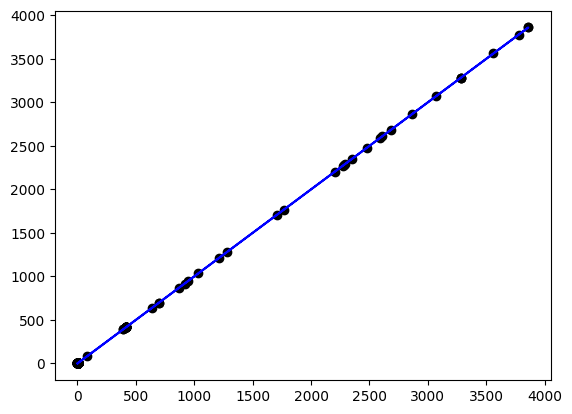

In [79]:
plt.scatter(X_test.iloc[:,0],y_test, color='black')
plt.plot(X_test.iloc[:,0], y_pred, color='blue')
plt.show()

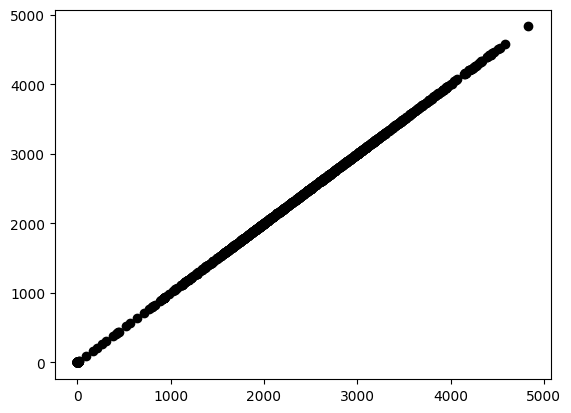

In [80]:
plt.scatter(X.iloc[:,0],y, color='black')